In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.environ["PATH"] += os.pathsep + "C:\Program Files\Graphviz\\bin" + os.pathsep + "C:\Program Files\Graphviz\\bin"
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML 
style = "<style>svg{width:10% !important;heigh:% !important;}</style>"
HTML(style)

In [3]:
titanic_data = pd.read_csv('C:/Users/stasz/data-sets/train.csv')

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
X = titanic_data.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = titanic_data.Survived

In [7]:
X = pd.get_dummies(X)

In [8]:
X = X.fillna({'Age': X.Age.median()})

In [9]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [10]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [12]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

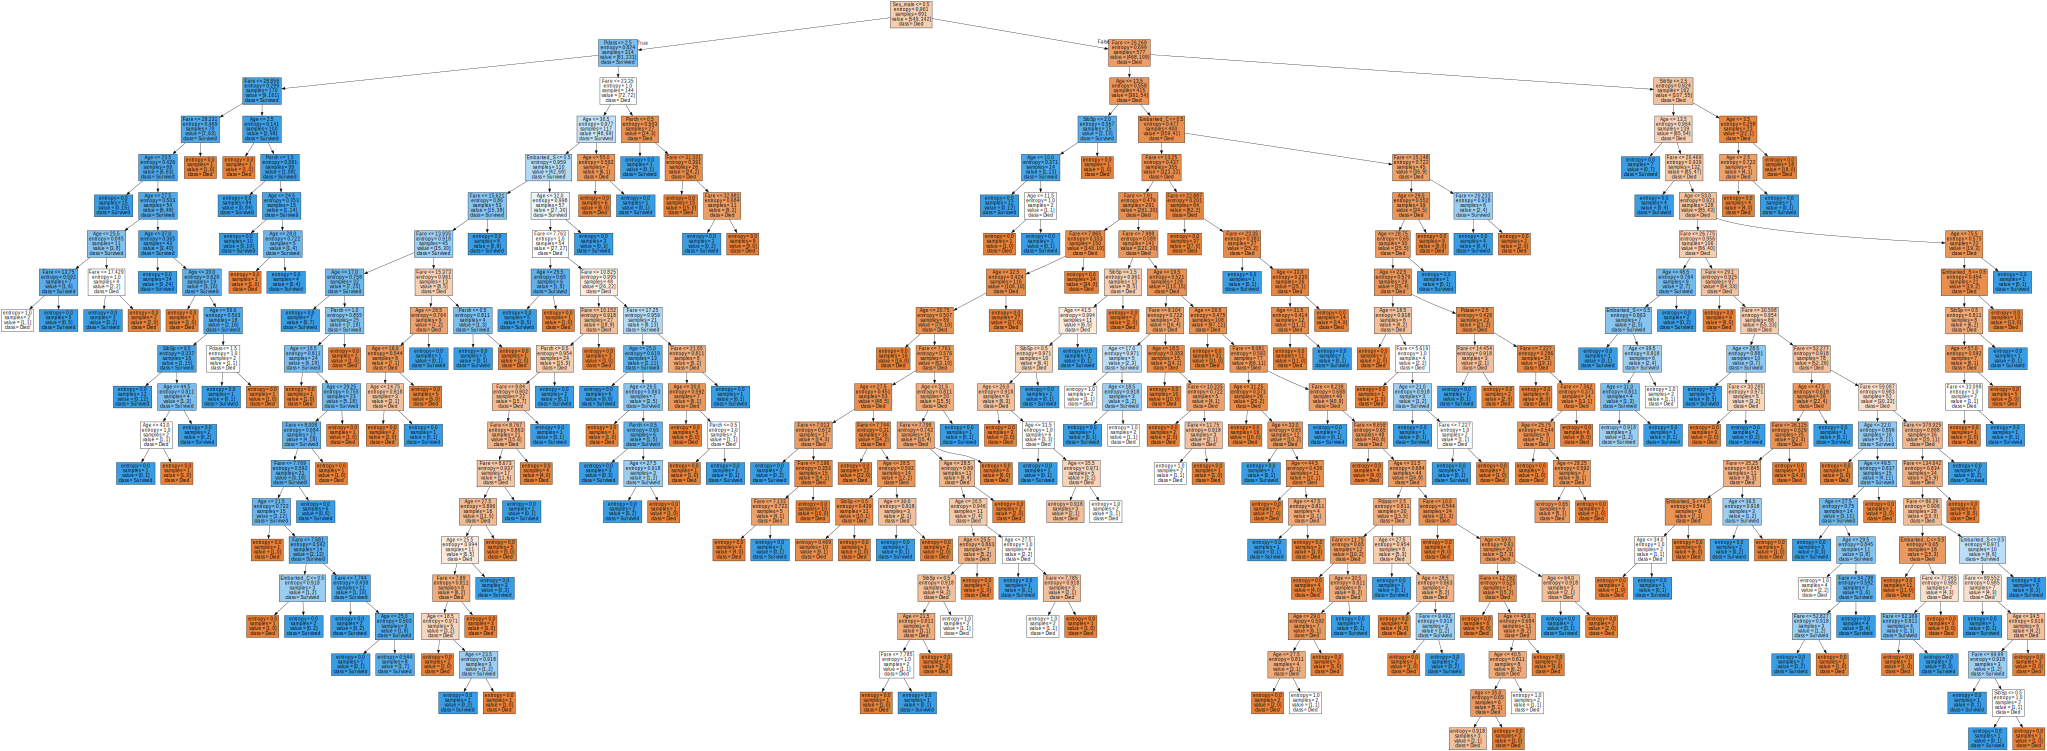

In [13]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [16]:
clf.score(X_train, y_train)

0.9798657718120806

In [17]:
clf.score(X_test, y_test)

0.9796610169491525

In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
clf.score(X_train, y_train)

0.825503355704698

In [21]:
clf.score(X_test, y_test)

0.8033898305084746

In [22]:
max_depth_values = range(1, 100)

In [23]:
scores_data = pd.DataFrame()

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

C:\Users\stasz\AppData\Local\Temp\ipykernel_2804\288019418.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\stasz\AppData\Local\Temp\ipykernel_2804\288019418.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\stasz\AppData\Local\Temp\ipykernel_2804\288019418.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\stasz\AppData\Local\Temp\ipykernel_2804\288019418.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_da

C:\Users\stasz\AppData\Local\Temp\ipykernel_2804\288019418.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\stasz\AppData\Local\Temp\ipykernel_2804\288019418.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\stasz\AppData\Local\Temp\ipykernel_2804\288019418.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\stasz\AppData\Local\Temp\ipykernel_2804\288019418.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_da

C:\Users\stasz\AppData\Local\Temp\ipykernel_2804\288019418.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\stasz\AppData\Local\Temp\ipykernel_2804\288019418.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\stasz\AppData\Local\Temp\ipykernel_2804\288019418.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\stasz\AppData\Local\Temp\ipykernel_2804\288019418.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_da

In [26]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.788591,0.783051,0.788655
0,2,0.788591,0.783051,0.770168
0,3,0.825503,0.803390,0.805378
0,4,0.843960,0.813559,0.810420
0,5,0.848993,0.806780,0.785266


In [27]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type',
                           value_name='score')

In [28]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.788591
1,2,train_score,0.788591
2,3,train_score,0.825503
3,4,train_score,0.843960
4,5,train_score,0.848993


In [29]:
scores_data_long.query('set_type == "cross_val_score"').head(20)
# на глубині 11 спостерігаємо найкращий результат, отже вибираємо число 11 як max_depth

,max_depth,set_type,score
198,1,cross_val_score,0.788655
199,2,cross_val_score,0.770168
200,3,cross_val_score,0.805378
201,4,cross_val_score,0.810420
202,5,cross_val_score,0.785266
203,6,cross_val_score,0.781891
204,7,cross_val_score,0.803754
205,8,cross_val_score,0.783585
206,9,cross_val_score,0.783613
207,10,cross_val_score,0.775196


<Axes: xlabel='max_depth', ylabel='score'>

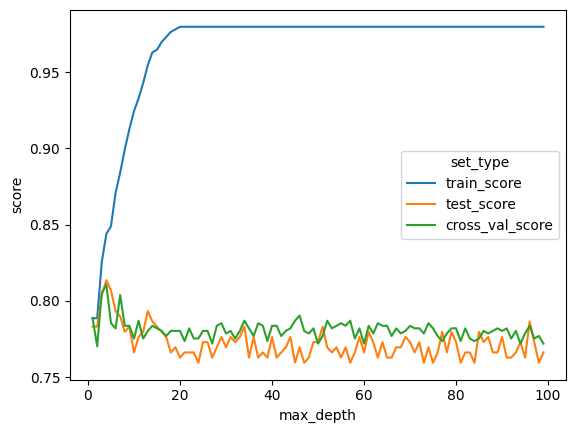

In [30]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')

In [31]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)
# створюємо нову "найкращу модель"

In [32]:
best_clf.fit(X_train, y_train)
# тренеруємо її на тренерувальній вибірці

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [33]:
best_clf.score(X_test, y_test)
# заміряємо точність на тестовій вибірці

0.7728813559322034

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
clf = tree.DecisionTreeClassifier()

In [36]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [37]:
grid_search_CV_clf = GridSearchCV(clf, parametrs, cv=5)

In [38]:
grid_search_CV_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [39]:
grid_search_CV_clf.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [40]:
best_clf = grid_search_CV_clf.best_estimator_

In [41]:
best_clf.score(X_test, y_test)

0.8135593220338984

In [42]:
from sklearn.metrics import precision_score, recall_score

In [43]:
y_pred = best_clf.predict(X_test)

In [44]:
precision_score(y_test, y_pred)

0.7745098039215687

In [45]:
recall_score(y_test, y_pred)

0.7117117117117117

In [46]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [47]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

<Axes: >

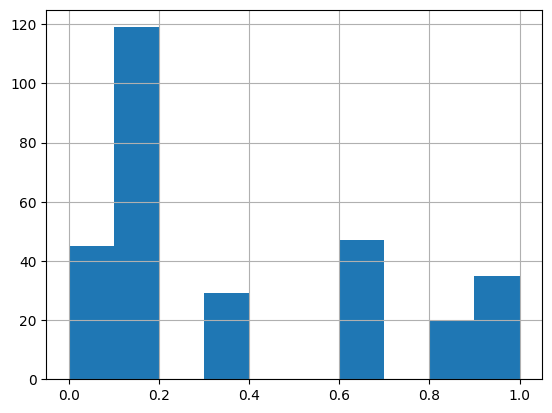

In [48]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [49]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.9, 1, 0)

In [50]:
precision_score(y_test, y_pred)

0.9714285714285714

In [51]:
recall_score(y_test, y_pred)

0.3063063063063063

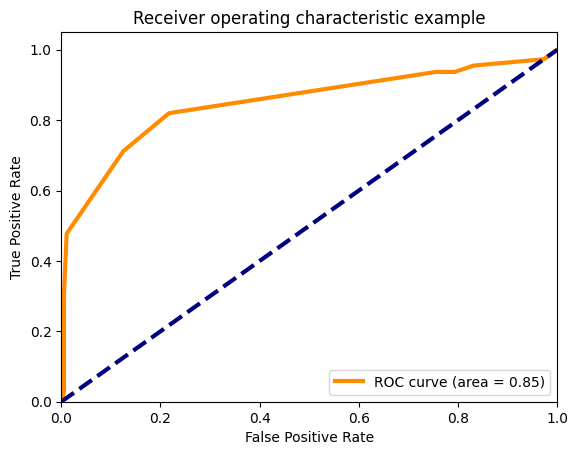

In [52]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()
#True Positive Rate - яку кількість пасажирів ми класифікували як виживші
#False Positive Rate - для якого відсотку пасажирів ми дали неправильну відповідь, як часто пасажирів, які не вижили,
#ми класифікували вижившими

In [53]:
from sklearn._config import get_config, set_config

set_config(print_changed_only=False)

In [54]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [55]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=10,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

[Text(0.5, 0.875, 'Sex_female <= 0.5\nentropy = 0.963\nsamples = 596\nvalue = [365, 231]'),
 Text(0.2, 0.625, 'Pclass <= 1.5\nentropy = 0.711\nsamples = 391\nvalue = [315, 76]'),
 Text(0.1, 0.375, 'entropy = 0.953\nsamples = 83\nvalue = [52, 31]'),
 Text(0.3, 0.375, 'Age <= 7.0\nentropy = 0.6\nsamples = 308\nvalue = [263, 45]'),
 Text(0.2, 0.125, 'entropy = 0.977\nsamples = 17\nvalue = [7, 10]'),
 Text(0.4, 0.125, 'entropy = 0.53\nsamples = 291\nvalue = [256, 35]'),
 Text(0.8, 0.625, 'Pclass <= 2.5\nentropy = 0.801\nsamples = 205\nvalue = [50, 155]'),
 Text(0.7, 0.375, 'Fare <= 28.856\nentropy = 0.358\nsamples = 118\nvalue = [8, 110]'),
 Text(0.6, 0.125, 'entropy = 0.536\nsamples = 49\nvalue = [6, 43]'),
 Text(0.8, 0.125, 'entropy = 0.189\nsamples = 69\nvalue = [2, 67]'),
 Text(0.9, 0.375, 'entropy = 0.999\nsamples = 87\nvalue = [42, 45]')]

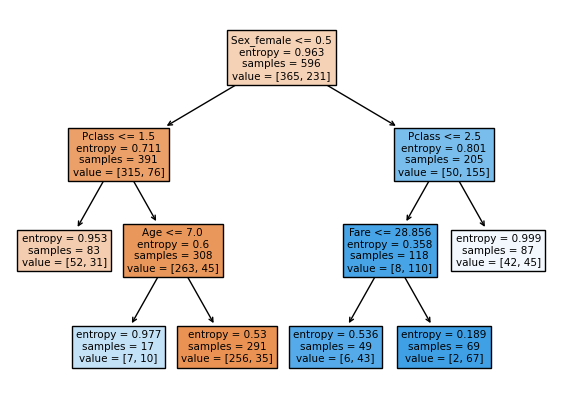

In [56]:
plt.figure(figsize=(7, 5))
tree.plot_tree(clf, filled=True, feature_names=list(X))